# tf.data 모듈
- 데이터 입력 파이프라인을 위한 모듈
    - 모델 학습/평가를 위한 데이터셋을 제공(feeding)하기 위한 모듈
   - raw dataset 에서 입력을 위한 **전처리**, **배치 크키**, **shuffling**등을 한번에 처리할 수 있게 한다.
- tf.data.Dataset 추상클래스에서 상속된 여러가지 클래스들을 제공
    - 입력 소스의 제공 형태, 어떤 처리를 하는지에 따라 다양한 하위클래스들이 제공된다.

## Dataset API 사용
1. **Dataset 생성**
    - raw dataset을 지정 (Loading)
    - from_tensor_slices(), from_generator() 클래스 메소드, tf.data.TFRecordDataset 클래스등를 사용해 메모리나 파일에 있는 데이터를 Dataset으로 만든다.
    - **from_tensor_slices()**: 메모리의 리스트, 넘파이배열, 텐서플로 자료형에서 데이터를 생성한다.

2. **제공 데이터 전처리**
    - **map(함수)**: Dataset이 제공하는 원소를 처리해서 변환된 원소를 제공하도록 한다.
        - 함수: 원소를 어떻게 변환할 지 정의한 함수를 매개변수로 전달한다.
            - 매개변수: Dataset이 제공하는 원소를 받을 변수. 
            - 반환값: Dataset이 제공한 원소를 변경처리한 값.
    - **filter(함수)**: Dataset이 제공하는 원소중 특정 조건을 만족하는(True)인 원소들만 제공한다.
        - 함수: 원소가 특정조건을 만족하는지 여부를 확인하는 로직을 정의한 함수를 매개변수로 전달한다.
            - 매개변수: Dataset이 제공하는 원소를 받을 변수.
            - 반환값: Dataset이 제공한 원소가 특정조건을 만족하는지 여부(bool)

3. **데이터 제공 설정 관련**
    - **batch(size)**: 학습/평가시 한번에 제공할 batch size 지정
        - size: int. batch size 지정
        - drop_remainder: bool. True일 경우 마지막 제공시 남은 데이터수가 batch size보다 작으면 제공하지 않는다.
    - **shuffle(buffer 크기)**: dataset의 원소들의 순서를 섞는다. 
        - buffer 크기: int. buffer 크기는 섞는 공간의 크기로  **데이터보다 크거나 같으면** 완전셔플, **적으면 일부만 가져와서 섞어** 완전셔플이 안된다.
        - 데이터 사이즈가 너무 커서 메모리가 부족할 경우 버퍼크기를 적게 준다.
        - 메모리가 충분하다면 데이터의 개수와 동일하게 주면된다.
    - **repeat(count)**: 전체 데이터를 한번 다 제공한 뒤 다시 데이터를 제공한다.
        - count: 몇번 제공할지 반복 횟수
        - shuffle이 적용된 Dataset의 경우 다음 반복 제공마다 shuffle을 진행한다. (에폭단위)
        

- 각 tf.data 함수들은 각 기능에 맞게 데이터를 처리하는 Dataset 객체를 반환한다.

### Dataset 메소드
- take(개수): 지정한 개수만큼의 데이터만 제공한다.

In [1]:
import tensorflow as tf
import numpy as np

##### Tensor Type
>- TensorFlow의 기본 data 자료구조.
>- numpy가 ndarray를 이용해 데이터를 관리하듯이 tensorflow를 Tensor를 이용해 데이터를 관리한다.
>    - Tesorflow의 모델이 학습, 평가할때 사용하는 데이터셋(train dataset, validation dataset, test dataset)은 tf.Tensor 타입이어야 한다.
>        - 학습/평가(model.fit(), model.evaluate()) 할때 ndarray를 입력 데이터셋으로 넣어주면 내부적으로 tf.Tensor로 변형해서 처리.
>        - tf.Tensor는 데이터셋을 ndarray로 가지고 있다.

In [2]:
# ndarray의 형태를 tensorflow로 변경 / Tensor안에 ndarray를 가지고있는 형태이다.
t = tf.constant([1,2,3], dtype='float32')
t

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [3]:
t.shape, t.dtype

(TensorShape([3]), tf.float32)

In [4]:
# Tensor -> ndarray로 변환
a = t.numpy()
a

array([1., 2., 3.], dtype=float32)

In [5]:
# ndarray/list => Tensor / 넣어서 생성하는 메소드
tf.constant(np.arange(10))

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])>

In [6]:
tf.convert_to_tensor(a)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

## Dataset 예제

In [7]:
# 0 ~ 9 정수 => input data
raw_data1 = np.arange(10)
raw_data1

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
# DataSet 을 생성 -> 대상 raw dataset이 메모리에 있는 ndarray일 경우
# ===> Raw dataset으로 부터 데이터를 읽어들이는 기능을 제공하는 Dataset 생성.
dataset = tf.data.Dataset.from_tensor_slices(raw_data1) # from_tensor_slices함수를 통해 ndarray를 읽어들인다.
print(type(dataset))

<class 'tensorflow.python.data.ops.from_tensor_slices_op._TensorSliceDataset'>


In [9]:
# Dataset은 Iterable타입
# 반환:tf.tensor타입으로 반환된 것을 확인 할 수 있다.
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [10]:
# 전체중에 지정한 갯수만큼만 조회:take
for data in dataset.take(5):  # dataset에서 5개만 조회 - 일부 데이터를 확인할 때 사용.
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)


##### x, y 묶어서 제공
- 두개 이상의 데이터셋을 묶어서 제공할 경우 Tuple로 묶어준다.
    - Dataset이 feeding 할 때는 같은 index의 값들을 tuple로 묶어서 제공 (zip()과 동일)

In [11]:
raw_data2 = np.arange(10, 20) # rawdata2생성
# 두개의 데이터셋 - raw_data1, raw_data2
print(raw_data1, len(raw_data1))   # X (input)
print(raw_data2, len(raw_data2))   # y (output)
# x가 1일때 y는 10

[0 1 2 3 4 5 6 7 8 9] 10
[10 11 12 13 14 15 16 17 18 19] 10


In [14]:
# 원래는 학습시 - model.fit(X_trian,y_train)
## 우리는 Dataset으로 만들기: 튜플로 묶어서 생성. (X_trian: raw_data1, y_train:raw_data2)

dataset2 = tf.data.Dataset.from_tensor_slices( (raw_data1, raw_data2) )
# 두 dataset(raw_data1, raw_data2)의 같은 index의 값들을 묶어서 튜플로 반환.
for data in dataset2.take(4):
    print(data)

(<tf.Tensor: shape=(), dtype=int32, numpy=0>, <tf.Tensor: shape=(), dtype=int32, numpy=10>)
(<tf.Tensor: shape=(), dtype=int32, numpy=1>, <tf.Tensor: shape=(), dtype=int32, numpy=11>)
(<tf.Tensor: shape=(), dtype=int32, numpy=2>, <tf.Tensor: shape=(), dtype=int32, numpy=12>)
(<tf.Tensor: shape=(), dtype=int32, numpy=3>, <tf.Tensor: shape=(), dtype=int32, numpy=13>)


In [15]:
# 전체 실행 시
for x, y in dataset2:
    print(x, y, sep=' ====== ')

tf.Tensor(0, shape=(), dtype=int32) ====== tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) ====== tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32) ====== tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32) ====== tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) ====== tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32) ====== tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32) ====== tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32) ====== tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32) ====== tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) ====== tf.Tensor(19, shape=(), dtype=int32)


##### shuffle
- 데이터셋을 섞는다.

In [16]:
for data in dataset:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)


In [17]:
raw_data1 = np.arange(10)
dataset = tf.data.Dataset.from_tensor_slices(raw_data1)
# 기존 Dataset객체.기능추가메소드() => 데이터 파이프라인에 기능을 추가.(chainning방식이라고 할 수 있다.)
dataset3 = dataset.shuffle(10) # 데이터를 제공하기 전에 섞는다. (순서를 랜덤하게 바꾼다.) 
                            # 10: buffer size(데이터개수로 지정) => raw data를 섞기 위해서 임시로 저장하는 저장소의 크기이다.
                            # buffer size는 총 데이터 개수에 맞춰주는 것이 좋다.(메모리가 허용하면.)
    print(type(dataset3))

<class 'tensorflow.python.data.ops.shuffle_op._ShuffleDataset'>


In [19]:
for data in dataset3:
    print(data)

tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


##### batch
- drop_remainder: boolean(기본-False)
    - batch로 제공할 데이터의 개수가 설정한 batch_size 보다 적으면 제공하지 않는다.
    - Train dataset을 만들때 True로 설정하여 항상 일정한 batch size로 학습할 수 있도록 한다. drop 되는 데이터는 다른 epoch을 반복할 때 사용된다.

In [20]:
dataset4 = dataset.batch(5)   # batch size 설정 => 반복시 지정한 개수만큼 한번에 제공.
print(type(dataset4))
for data in dataset4:
    print(data)

<class 'tensorflow.python.data.ops.batch_op._BatchDataset'>
tf.Tensor([0 1 2 3 4], shape=(5,), dtype=int32)
tf.Tensor([5 6 7 8 9], shape=(5,), dtype=int32)


In [22]:
# 읽어올 데이터의 개수가 batch_size보다 적으면 제공하지 않는다.
# drop_remainder: batch하고 남은 나머지를 버릴지 말지 결정 (drop_remainder=False=> 버지리 않음 / True=>버림)
dataset5 = dataset.batch(3, drop_remainder=True)
for data in dataset5:
    print(data)

tf.Tensor([0 1 2], shape=(3,), dtype=int32)
tf.Tensor([3 4 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 8], shape=(3,), dtype=int32)


##### repeat

In [23]:
dataset6 = dataset.repeat(5)  # 지정한 횟수만큼 데이터를 반복해서 제공한다. (default: 1 - 한번)
print(type(dataset6))
for data in dataset6:
    print(data)

<class 'tensorflow.python.data.ops.repeat_op._RepeatDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(7, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32)
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(3, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(5, shape=(), dtype=int32)
tf

In [24]:
dataset7 = tf.data.Dataset.from_tensor_slices(raw_data1).shuffle(10).batch(3).repeat(3) # 데이터셋을 반복할때 마다 shuffle
for data in dataset7:
    print(data)

tf.Tensor([1 3 5], shape=(3,), dtype=int32)
tf.Tensor([6 7 4], shape=(3,), dtype=int32)
tf.Tensor([0 9 8], shape=(3,), dtype=int32)
tf.Tensor([2], shape=(1,), dtype=int32)
tf.Tensor([9 8 0], shape=(3,), dtype=int32)
tf.Tensor([4 5 1], shape=(3,), dtype=int32)
tf.Tensor([6 7 3], shape=(3,), dtype=int32)
tf.Tensor([2], shape=(1,), dtype=int32)
tf.Tensor([9 8 3], shape=(3,), dtype=int32)
tf.Tensor([6 7 4], shape=(3,), dtype=int32)
tf.Tensor([5 1 2], shape=(3,), dtype=int32)
tf.Tensor([0], shape=(1,), dtype=int32)


##### map

In [25]:
# map(함수)
# 함수 구문: 매개변수-원소 한개를 받는다., 반환: 변환한 값을 반환.
dataset8 = dataset.map(lambda x: x * 2) # x:원소-> 원소를 두배한 값으로 변경해서 제공
print(type(dataset8))
for data in dataset8:
    print(data)

<class 'tensorflow.python.data.ops.map_op._MapDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)
tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(18, shape=(), dtype=int32)


In [29]:
# 두개의 dataset(x,y)을 묶은 Dataset객체
def map_func(x, y): # raw_data1: x, raw_data2: y
    return x**2, y   # X는 제곱, y는 그대로 반환.

dataset9 = dataset2.map(map_func)
for x, y in dataset9:
    print(x, y)
# dataset9 = dataset2.map(lambda x,y: (x**2,y+10)) # x제곱,y+10
# for x, y in dataset9:
#     print(x, y)

tf.Tensor(0, shape=(), dtype=int32) tf.Tensor(10, shape=(), dtype=int32)
tf.Tensor(1, shape=(), dtype=int32) tf.Tensor(11, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32) tf.Tensor(12, shape=(), dtype=int32)
tf.Tensor(9, shape=(), dtype=int32) tf.Tensor(13, shape=(), dtype=int32)
tf.Tensor(16, shape=(), dtype=int32) tf.Tensor(14, shape=(), dtype=int32)
tf.Tensor(25, shape=(), dtype=int32) tf.Tensor(15, shape=(), dtype=int32)
tf.Tensor(36, shape=(), dtype=int32) tf.Tensor(16, shape=(), dtype=int32)
tf.Tensor(49, shape=(), dtype=int32) tf.Tensor(17, shape=(), dtype=int32)
tf.Tensor(64, shape=(), dtype=int32) tf.Tensor(18, shape=(), dtype=int32)
tf.Tensor(81, shape=(), dtype=int32) tf.Tensor(19, shape=(), dtype=int32)


##### filter

In [31]:
# filter(함수) - 특정 조건을 만족하는 원소들만 제공
## 함수구문 - 매개변수: 원소를 받을 변수. 반환: bool(True인 원소만 제공)
def filter_func(x):
    return x % 2 == 0  # 2의 배수: True

# dataset11 = dataset.filter(lambda x: x%2 ==0)
# print(type(dataset11))
# for data in dataset11:
#     print(data)
dataset11 = dataset.filter(filter_func)
print(type(dataset11))
for data in dataset11:
    print(data)

<class 'tensorflow.python.data.ops.filter_op._FilterDataset'>
tf.Tensor(0, shape=(), dtype=int32)
tf.Tensor(2, shape=(), dtype=int32)
tf.Tensor(4, shape=(), dtype=int32)
tf.Tensor(6, shape=(), dtype=int32)
tf.Tensor(8, shape=(), dtype=int32)


# 문제 유형별 MLP 네트워크
- MLP(Multi Layer Perceptron), ANN(Artificial Neural Network), DNN (Deep Neural Network)
    - Fully Connected Layer(Dense)로 구성된 네트워크

# Regression(회귀)

## Boston Housing Dataset
보스턴 주택가격 dataset은 다음과 같은 속성을 바탕으로 해당 타운 주택 가격의 중앙값을 예측하는 문제.
- CRIM: 범죄율
- ZN: 25,000 평방피트당 주거지역 비율
- INDUS: 비소매 상업지구 비율
- CHAS: 찰스강에 인접해 있는지 여부(인접:1, 아니면:0)
- NOX: 일산화질소 농도(단위: 0.1ppm)
- RM: 주택당 방의 수
- AGE: 1940년 이전에 건설된 주택의 비율
- DIS: 5개의 보스턴 직업고용센터와의 거리(가중 평균)
- RAD: 고속도로 접근성
- TAX: 재산세율
- PTRATIO: 학생/교사 비율
- B: 흑인 비율
- LSTAT: 하위 계층 비율
<br><br>
- **Target**
    - MEDV: 타운의 주택가격 중앙값(단위: 1,000달러)

In [32]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers # layers.Dense()
# from tensorflow.keras.layers import Dense,ReLU

import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler # 회귀형 데이터셋 전처리(표준화)

import random

In [33]:
# random seed값 설정
tf.random.set_seed(0)
np.random.seed(0)
# python 랜덤 패키지에 있는 랜덤 또한 seed값을 설정해주었다.
random.seed(0)

##### 데이터 로딩

In [34]:
(train_X, y_train), (test_X, y_test) = keras.datasets.boston_housing.load_data()
print(train_X.shape, y_train.shape)
print(test_X.shape, y_test.shape)

57026/57026 [==============================] - 0s 0us/step
(404, 13) (404,)
(102, 13) (102,)


In [35]:
print(train_X[0])
print(y_train[0])

[  1.23247   0.        8.14      0.        0.538     6.142    91.7
   3.9769    4.      307.       21.      396.9      18.72   ]
15.2


##### 하이퍼파라미터, 변수 정의

In [36]:
#하이퍼파라미터 변수

# 학습율 => 경사하강법에서 구한 gradient(경사-미분계수)에 곱해주는 값으로 0 ~ 1 사이 실수를 지정한다. optimizer 생성때 설정.
LEARNING_RATE = 0.001  
N_EPOCH = 200 # 에폭수
N_BATCH = 400 # Train 배치사이즈
N_BATCH_VAL = 50 # Validation/evaluation 배치 사이즈. ==> 교차검증 폴더 데이터 수.

##### X, y 전처리
- MLP는 선형모델을 기반으로 하므로 Feature scaling을 해준다.

In [37]:
scaler = StandardScaler()
X_train = scaler.fit_transform(train_X)
X_test = scaler.transform(test_X)

##### Dataset 생성

- validation/test set의 pipe line은 동일하게 구성한다.
- train dataset은 shuffle을 추가하고 batch에 drop_remainder=True를 설정한다.
- map, filter 를 pipe line에 추가할 경우 train/validation/test set에 모두 동일하게 적용한다.

In [41]:
#  X_train,y_train ==> ndarray로 메모리 ===> form_tensor_slices()
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train)).shuffle(X_train.shape[0]).batch(N_BATCH, drop_remainder=True)
# 연결 -> 데이터 로딩
# 에폭별로 랜덤하게 순서를 섞기
# batch size 지정 -> 지정된 개수만큼 한번에 모델에 제공
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH_VAL)

In [42]:
# 애폭(epoch)당 step수: 전체 데이터셋 한번 학습할 때 파라미터 업데이트를 몇번하는지.
# ex) 5epoch돌겠다-> 전체 데이터셋을 5번 반복하겠다.
# drop_remainder=True:전체 데이터개수 // batch size
# drop_remainder=False: ceil(전체 데이터개수 / batch size)
print('에폭당 step수:', len(train_dataset))
print('에폭당 step수:', len(test_dataset))

에폭당 step수: 1
에폭당 step수: 3


##### 모델 구현

1. 모델 객체 생성 - Sequential
2. 모델에 Layer들 추가
    - Input Layer 추가
        - 입력 데이터의 shape을 지정한다.
        1. InputLayer 객체를 생성해서 추가한다.
        2. 첫번째 Hidden Layer에 input_shape 매개변수에 shape을 지정하여 추가한다.
    - Hidden Layer들 추가
        - Layer의 개수와 Layer의 Unit의 개수는 튜닝대상으로 성능에 영향을 준다.
        - 활성함수는 ReLU 를 사용한다.
        - Layer의 개수와 Unit 개수가 많을 수록 복잡한 모델, 적을 수록 단순한 모델이된다.
    - Output Layer 추가
        - 풀려는 문제에 따라 unit개수와 활성함수를 지정한다.

In [43]:
def get_model_boston(lr=0.01):
    model = keras.Sequential() # 빈 모델을 생성
    # 레이어 추가
    ## inputlayer
    # mode.add(layer.Inputlayer(input_shape=(13,)))
    # Hedden layer
    # Dense layer의 경우 unit의 개수를 줄여나간다. : 32->16->8
    model.add(layers.Dense(units=32, activation='relu', input_shape=(13, )))
    model.add(layers.Dense(units=16, activation='relu'))
    model.add(layers.Dense(units=8, activation='relu'))
    ## output layer
    ## unit 개수: 모델이 추정하려는 값의 개수에 맞춰서 설정. 집값-1
    ## activation 함수: 일반적으로 생략 -None(기본)
    ## 예외: 값의 범위가 정해져 있고 그 범위값을 출력하는 함수가 있을 경우 그 함수를 사용
    ## ex) 0~1:sigmod,-1~1:tanh
    model.add(layers.Dense(units=1))
    
    # 컴파일 - optimizer, loss함수 (필수), metrice(선택사항)
    # optimizer를 default값으로 생성할 것을 사용할 경우 문자열로 지정. ("adam")
   v
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=lr), # 특별한 경우아니면 learning_rate=lr만 써도된다.
                  loss='mse')
    
    # 모델 정의 + 컴파일까지완료=> 학습가능한 모델이다.
    return model

In [46]:
13+1
14*32

448

In [44]:
model_boston = get_model_boston() # 컴파일된 모델을 반환.

# 딥러닝 모델의 구조 확인
model_boston.summary()
# 파라미터는 유닛과 bias의 개수가 된다.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                448       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 1121 (4.38 KB)
Trainable params: 1121 (4.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


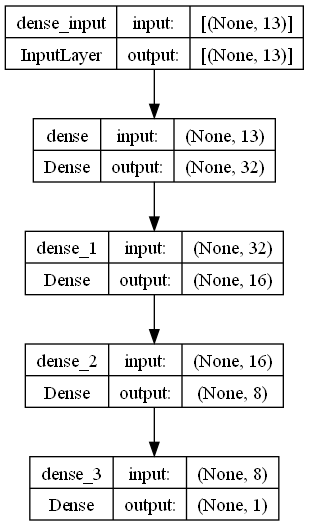

In [47]:
keras.utils.plot_model(model_boston, show_shapes=True)

##### 학습(Train)

In [56]:
# train_dataset 생성->X, y를 제공
hist = model_boston.fit(train_dataset, ### (X_train, y_train) + shuffle + batch_size
                        epochs=N_EPOCH, 
                        validation_data=test_dataset   # Dataset을 이용할 경우 validation_split을 사용할 수 없다.
                        )

Epoch 1/200
1/1 [==============================] - 0s 33ms/step - loss: 4.8567 - val_loss: 17.7122
Epoch 2/200
1/1 [==============================] - 0s 21ms/step - loss: 5.3984 - val_loss: 17.6319
Epoch 3/200
1/1 [==============================] - 0s 23ms/step - loss: 5.3853 - val_loss: 17.6227
Epoch 4/200
1/1 [==============================] - 0s 19ms/step - loss: 5.3743 - val_loss: 17.6452
Epoch 5/200
1/1 [==============================] - 0s 22ms/step - loss: 5.3386 - val_loss: 17.6351
Epoch 6/200
1/1 [==============================] - 0s 23ms/step - loss: 5.3458 - val_loss: 17.5920
Epoch 7/200
1/1 [==============================] - 0s 22ms/step - loss: 5.3248 - val_loss: 17.5213
Epoch 8/200
1/1 [==============================] - 0s 20ms/step - loss: 5.3362 - val_loss: 17.4993
Epoch 9/200
1/1 [==============================] - 0s 23ms/step - loss: 5.2795 - val_loss: 17.5323
Epoch 10/200
1/1 [==============================] - 0s 17ms/step - loss: 5.2766 - val_loss: 17.5606
Epoch 11/

1/1 [==============================] - 0s 19ms/step - loss: 4.6867 - val_loss: 15.5942
Epoch 84/200
1/1 [==============================] - 0s 18ms/step - loss: 4.6557 - val_loss: 15.6560
Epoch 85/200
1/1 [==============================] - 0s 18ms/step - loss: 4.5700 - val_loss: 15.4775
Epoch 86/200
1/1 [==============================] - 0s 18ms/step - loss: 4.6825 - val_loss: 15.3834
Epoch 87/200
1/1 [==============================] - 0s 17ms/step - loss: 4.6849 - val_loss: 15.3704
Epoch 88/200
1/1 [==============================] - 0s 18ms/step - loss: 4.6294 - val_loss: 15.4194
Epoch 89/200
1/1 [==============================] - 0s 19ms/step - loss: 4.6756 - val_loss: 15.4310
Epoch 90/200
1/1 [==============================] - 0s 20ms/step - loss: 4.6550 - val_loss: 15.3899
Epoch 91/200
1/1 [==============================] - 0s 20ms/step - loss: 4.6022 - val_loss: 15.3973
Epoch 92/200
1/1 [==============================] - 0s 18ms/step - loss: 4.6332 - val_loss: 15.4240
Epoch 93/200


##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [51]:
hist.epoch
hist.params

{'verbose': 1, 'epochs': 200, 'steps': 1}

In [52]:
hist.history.keys()

dict_keys(['loss', 'val_loss'])

In [53]:
type(hist.history['loss'])

list

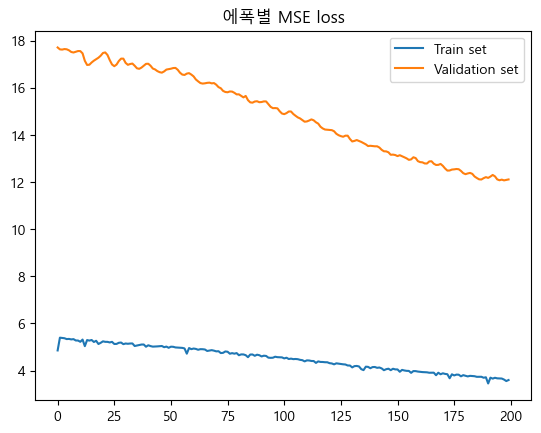

In [59]:
# hist.history : 에폭별 검증 결과
# hist.epoch : 에폭리스트
plt.plot(hist.epoch, hist.history['loss'], label='Train set')
plt.plot(hist.epoch, hist.history['val_loss'], label='Validation set')

plt.title('에폭별 MSE loss')
# plt.ylim(0, 30) # y값의 범위 0~30 줄임.(값의 변화가 클때 변화율을 확인하기위해)
plt.legend()
plt.show()
# 성능이 개선 되는 추세에서 멈췄으므로 epoch을 더 크게 잡고 학습 해야 한다.

##### 최종 테스트

In [61]:
loss = model_boston.evaluate(test_dataset)

3/3 [==============================] - 0s 3ms/step - loss: 12.1127


In [62]:
loss

12.112702369689941

##### 모델 네트워크 저장

In [77]:
import os
# path = 'saved_model' # 모든 모델들을 저장할 디렉토리 경로.
# os.makedirs(path, exist_ok=True) # 디렉토리 생성(없으면 생성, 있으면 생성안함)
# saved_dir = os.path.join(path, 'boston_model') # boston_dataset을 학습한 모델을 저장할 디렉토리.
saved_dir = r"c:\classes\saved_model\boston_model" 

In [78]:
saved_dir

'c:\\classes\\saved_model\\boston_model'

In [79]:
print(saved_dir)
model_boston.save(saved_dir) # 디렉토리가 없으면 생성
# 모델 저장 => 저장할 디렉토리를 문자열로 전달.

c:\classes\saved_model\boston_model
INFO:tensorflow:Assets written to: c:\classes\saved_model\boston_model\assets


INFO:tensorflow:Assets written to: c:\classes\saved_model\boston_model\assets


##### 새로운 데이터 추론

In [80]:
# 저장된 모델을 불러와서 추론
saved_model = keras.models.load_model(saved_dir) # 모델이 저장된 디렉토리 경로 전달.
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 3ms/step - loss: 12.1127


12.112702369689941

In [81]:
X_new = X_test[:5]
# 추론: model.predict(X)
pred = saved_model.predict(X_new)
print(pred)

1/1 [==============================] - 0s 101ms/step
[[ 8.463146]
 [18.314398]
 [21.863432]
 [31.050482]
 [23.5967  ]]


In [82]:
y_test[:5]

array([ 7.2, 18.8, 19. , 27. , 22.2])

# 분류 (Classification)

## Fashion MNIST Dataset - 다중분류(Multi-Class Classification) 문제

10개의 범주(category)와 70,000개의 흑백 이미지로 구성된 [패션 MNIST](https://github.com/zalandoresearch/fashion-mnist) 데이터셋. 
이미지는 해상도(28x28 픽셀)가 낮고 다음처럼 개별 의류 품목을 나타낸다:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>그림</b> <a href="https://github.com/zalandoresearch/fashion-mnist">패션-MNIST 샘플</a> (Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

이미지는 28x28 크기이며 Gray scale이다. *레이블*(label)은 0에서 9까지의 정수 배열이다. 아래 표는 이미지에 있는 의류의 **클래스**(class)들이다.

<table>
  <tr>
    <th>레이블</th>
    <th>클래스</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trousers</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

각 이미지는 하나의 레이블에 매핑되어 있다. 데이터셋에 클래스 이름이 들어있지 않기 때문에 나중에 이미지를 출력할 때 사용하기 위해 별도의 변수를 만들어 저장한다.

In [83]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

import numpy as np
import matplotlib.pyplot as plt

import os
import random

# seed 값 설정
random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

In [84]:
# class index -> class name
class_names = np.array(['T-shirt/top', 'Trousers', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

##### Data 로딩

In [85]:
(train_image, y_train), (test_image, y_test) = keras.datasets.fashion_mnist.load_data()
train_image.shape, y_train.shape, test_image.shape, y_test.shape

4422102/4422102 [==============================] - 0s 0us/step


((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [86]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

##### validatation dataset set  분리
- Train set을 Train/validation set으로 분리

In [87]:
from sklearn.model_selection import train_test_split # 데이터가 numpy배열일 경우 그냥 train_test_split을 쓰면 알아서 셜플까지 해준다.
train_image, val_image, y_train, y_val = train_test_split(train_image,
                                                          y_train, 
                                                          test_size=0.2, 
                                                          stratify=y_train, 
                                                          random_state=0)
train_image.shape, val_image.shape

((48000, 28, 28), (12000, 28, 28))

##### 이미지 확인

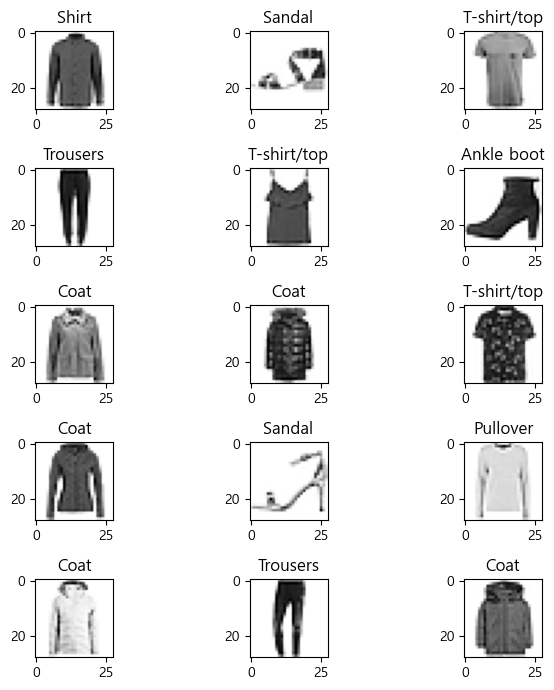

In [88]:
cnt = 15  # 확인할 이미지개수 (5배수)
plt.figure(figsize=(7,7))
for i in range(cnt):
    plt.subplot(5, int(cnt/5), i+1) # 5행 _열
    plt.imshow(train_image[i], cmap='Greys')  # gray: 0-black, 255: white,  Greys: 0-white, 255-black
    label = class_names[y_train[i]]
    plt.title(label)
    
plt.tight_layout()
plt.show()

#### 하이퍼파라미터, 변수 설정

In [89]:
LEARNING_RATE = 0.001  # 학습률
N_EPOCH = 20          # 에폭수
N_BATCH = 1000         # 배치 사이즈

#### X, y  전처리
- y값 처리
    1. 다중 분류에서 label encoding 형식의 label을 one hot encoding 처리 ==> loss: categorical_crossentropy
    2. label encoding 형식의 label을 그대로 모델에 전달. => loss: sparse_categorical_crossentropy
        - one hot encoding 처리를 loss가 대신 한다.

- x값(이미지) 처리
    - dtype을 uint8에서 float32로 변환한다.
    - 0 ~ 1 정규화. X/255.0으로 나눈다.

In [90]:
X_train = train_image.astype('float32')/255.0
X_val = val_image.astype('float32')/255.0
X_test = test_image.astype('float32')/255.0

In [91]:
print(train_image.min(), train_image.max())
print(X_train.min(), X_train.max())

0 255
0.0 1.0


In [93]:
X_train.shape, X_val.shape, X_test.shape

((48000, 28, 28), (12000, 28, 28), (10000, 28, 28))

In [95]:
y_train[:10]

array([6, 5, 0, 1, 0, 9, 4, 4, 0, 4], dtype=uint8)

##### Dataset 생성

In [96]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))\
                               .shuffle(X_train.shape[0]).batch(N_BATCH, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val)).batch(N_BATCH)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test)).batch(N_BATCH)

In [97]:
# 에폭당 step 수 계산
len(train_dataset), len(val_dataset), len(test_dataset)

(48, 12, 10)

##### 모델 생성 및 컴파일

In [98]:
def get_model_fashion(lr=0.01):
    model = keras.Sequential() # 빈모델 생성
    
    
    # 모델에 layer들 추가
    # input: (28,28) ==> 2차원 Dense layer는 입력으로 1차원 배열을 받는다. 2차원을 1차원으로 변환: Flatten layer
    model.add(layers.Flatten(input_shape=(28, 28)))
    
    # hidden layer
    # Dense Layer의 Unit개수는 점점 줄여나가는 패턴을 사용.
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    
    # output layer
    ### unit 개수: class 개수 (class개수가 10개 이므로 out layer의 unit도 10개로 한다.)
    ### activation 함수: softmax ==> class별 확률을 출력하도록 한다.
    model.add(layers.Dense(10, activation='softmax', name='output'))
    
    # 컴파일
    # 다중분류 loss함수:
#             y가 one hot encoding이 안된 경우: sparse_categorical_crossentropy (1. 원핫인코딩 처리 2. loss계산)
#             y를 one hot encoding 한 경우: categorical_crossentropy
    model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='sparse_categorical_crossentropy',   
                  metrics=['accuracy']
                 )
    return model

In [99]:
model_fashion = get_model_fashion(LEARNING_RATE)
model_fashion.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_4 (Dense)             (None, 256)               200960    
                                                                 
 dense_5 (Dense)             (None, 128)               32896     
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 output (Dense)              (None, 10)                330       
                                                                 
Total params: 244522 (955.16 KB)
Trainable params: 244

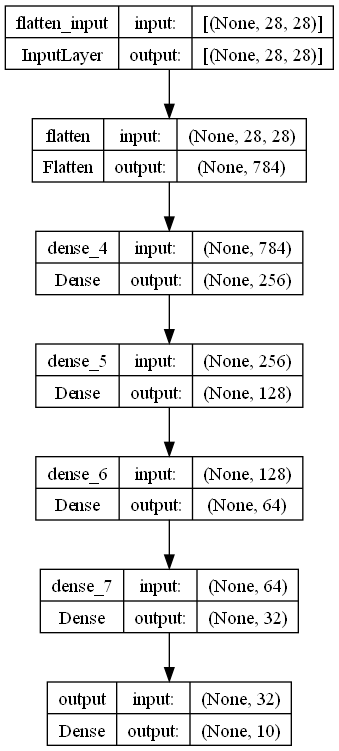

In [100]:
keras.utils.plot_model(model_fashion, show_shapes=True)

##### Train(학습)

In [101]:
hist = model_fashion.fit(train_dataset, epochs=N_EPOCH, validation_data=val_dataset)

Epoch 1/20
48/48 [==============================] - 1s 14ms/step - loss: 1.0248 - accuracy: 0.6647 - val_loss: 0.6009 - val_accuracy: 0.7933
Epoch 2/20
48/48 [==============================] - 1s 12ms/step - loss: 0.5066 - accuracy: 0.8295 - val_loss: 0.4768 - val_accuracy: 0.8303
Epoch 3/20
48/48 [==============================] - 1s 13ms/step - loss: 0.4376 - accuracy: 0.8487 - val_loss: 0.4193 - val_accuracy: 0.8512
Epoch 4/20
48/48 [==============================] - 1s 13ms/step - loss: 0.3977 - accuracy: 0.8615 - val_loss: 0.3928 - val_accuracy: 0.8597
Epoch 5/20
48/48 [==============================] - 1s 11ms/step - loss: 0.3862 - accuracy: 0.8644 - val_loss: 0.3839 - val_accuracy: 0.8614
Epoch 6/20
48/48 [==============================] - 1s 12ms/step - loss: 0.3639 - accuracy: 0.8709 - val_loss: 0.3663 - val_accuracy: 0.8699
Epoch 7/20
48/48 [==============================] - 1s 13ms/step - loss: 0.3395 - accuracy: 0.8796 - val_loss: 0.3613 - val_accuracy: 0.8679
Epoch 8/20
48

##### 결과 시각화
- 학습 시 epoch별 검증 결과를 시각화한다.

In [102]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [103]:
hist.epoch

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

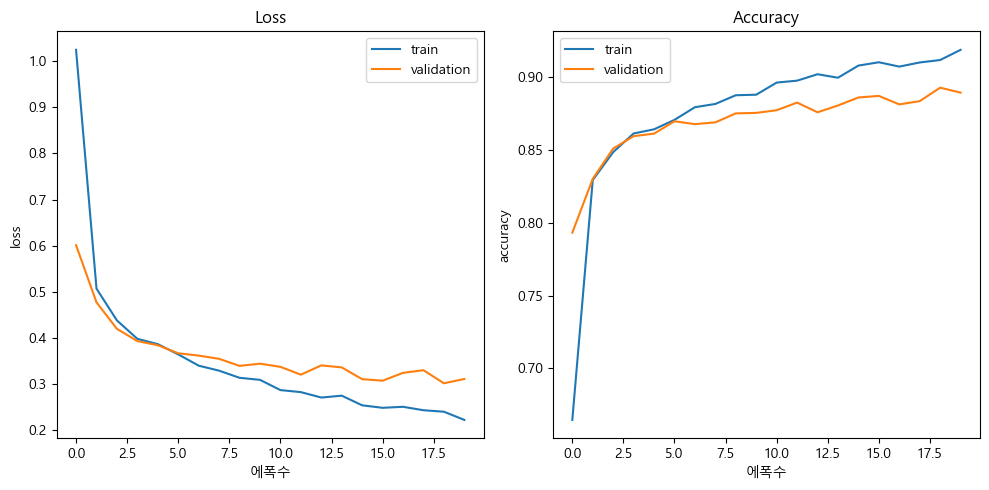

In [104]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('에폭수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('에폭수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [105]:
model_fashion2 = get_model_fashion(LEARNING_RATE)

hist = model_fashion2.fit(train_dataset, epochs=20, validation_data=val_dataset)

Epoch 1/20
48/48 [==============================] - 1s 14ms/step - loss: 0.9157 - accuracy: 0.6881 - val_loss: 0.5585 - val_accuracy: 0.8019
Epoch 2/20
48/48 [==============================] - 1s 11ms/step - loss: 0.4949 - accuracy: 0.8267 - val_loss: 0.4725 - val_accuracy: 0.8299
Epoch 3/20
48/48 [==============================] - 1s 11ms/step - loss: 0.4234 - accuracy: 0.8527 - val_loss: 0.4182 - val_accuracy: 0.8471
Epoch 4/20
48/48 [==============================] - 1s 11ms/step - loss: 0.3882 - accuracy: 0.8640 - val_loss: 0.4186 - val_accuracy: 0.8440
Epoch 5/20
48/48 [==============================] - 1s 11ms/step - loss: 0.3712 - accuracy: 0.8680 - val_loss: 0.3757 - val_accuracy: 0.8648
Epoch 6/20
48/48 [==============================] - 1s 11ms/step - loss: 0.3582 - accuracy: 0.8738 - val_loss: 0.3531 - val_accuracy: 0.8705
Epoch 7/20
48/48 [==============================] - 1s 11ms/step - loss: 0.3295 - accuracy: 0.8806 - val_loss: 0.3669 - val_accuracy: 0.8665
Epoch 8/20
48

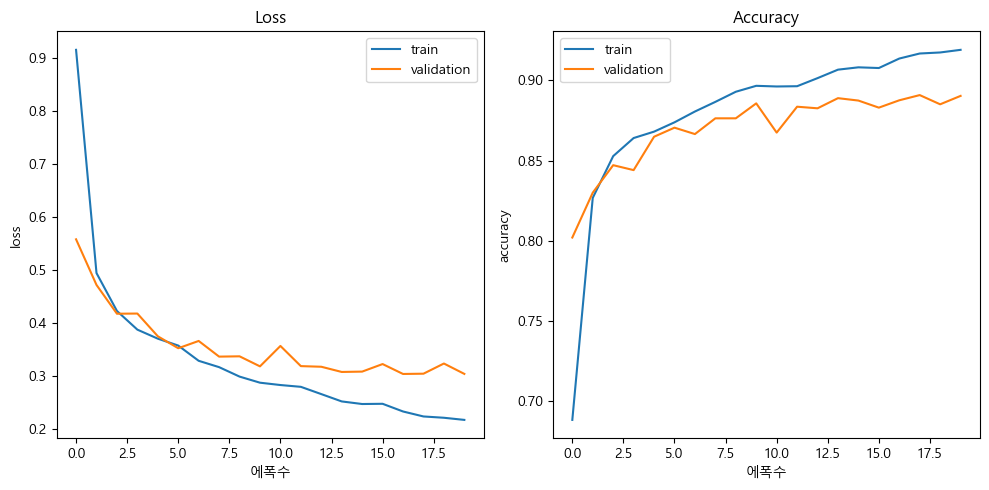

In [106]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.xlabel('에폭수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('에폭수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [107]:
# test set
loss, acc = model_fashion2.evaluate(test_dataset)

10/10 [==============================] - 0s 10ms/step - loss: 0.3348 - accuracy: 0.8822


In [108]:
print(loss, acc, sep=" , ")

0.3348418176174164 , 0.8822000026702881


#### 모델저장

In [109]:
save_dir_fashion = 'saved_model/fashion_mnist_model'

In [110]:
model_fashion2.save(save_dir_fashion)

INFO:tensorflow:Assets written to: saved_model/fashion_mnist_model\assets


INFO:tensorflow:Assets written to: saved_model/fashion_mnist_model\assets


#### 새로운 데이터 추론

In [111]:
# 저장된 모델을 loading해서 추론
saved_model_fashion = keras.models.load_model(save_dir_fashion)
saved_model_fashion.evaluate(test_dataset)

10/10 [==============================] - 0s 7ms/step - loss: 0.3348 - accuracy: 0.8822


[0.3348418176174164, 0.8822000026702881]

In [112]:
new_X = X_test[1000:1010]
new_X.shape

(10, 28, 28)

In [113]:
pred = saved_model_fashion.predict(new_X)
pred.shape

1/1 [==============================] - 0s 50ms/step


(10, 10)

In [114]:
pred
# class별 확률

array([[3.2053733e-01, 3.2238927e-07, 4.5621102e-03, 8.5527328e-04,
        1.5932708e-05, 8.2827599e-12, 6.7379075e-01, 8.5324707e-09,
        2.3724740e-04, 1.0279844e-06],
       [1.1561068e-06, 2.6924263e-06, 9.7480017e-07, 9.9995768e-01,
        1.8522493e-05, 7.2565831e-10, 1.8358467e-05, 2.2508954e-12,
        6.0575803e-07, 3.6287691e-09],
       [9.7182999e-12, 3.3806298e-09, 3.9186722e-07, 1.7733204e-07,
        1.2138487e-10, 9.9999177e-01, 1.8328285e-07, 1.3765222e-08,
        4.4995751e-13, 7.3715878e-06],
       [8.7907084e-11, 2.1000174e-08, 1.4587330e-07, 8.4086099e-07,
        8.9096215e-09, 9.9999869e-01, 1.7300594e-07, 1.3665464e-08,
        1.4209258e-09, 9.6735945e-08],
       [1.1323111e-03, 1.4054065e-04, 2.7015001e-01, 1.0969242e-03,
        1.3441284e-01, 9.7867460e-06, 5.9251285e-01, 2.2660273e-05,
        1.5677247e-04, 3.6529530e-04],
       [2.7103838e-02, 1.7833207e-03, 3.2458603e-01, 7.1913011e-02,
        3.6958826e-01, 4.5001940e-07, 2.0295635e-01, 8.34

In [115]:
# 모델 추론결과에 대한 후처리 작업
label = np.argmax(pred, axis=-1)
label_name = class_names[label]
proba = np.max(pred, axis=-1) # 값이 확률이므로 max를 사용하였다.
label,  label_name, proba*100

(array([6, 3, 5, 5, 6, 4, 5, 9, 6, 3], dtype=int64),
 array(['Shirt', 'Dress', 'Sandal', 'Sandal', 'Shirt', 'Coat', 'Sandal',
        'Ankle boot', 'Shirt', 'Dress'], dtype='<U11'),
 array([67.379074, 99.995766, 99.999176, 99.99987 , 59.251286, 36.958824,
        99.999916, 99.686615, 72.46787 , 98.93326 ], dtype=float32))

In [116]:
for idx, (n, p) in enumerate(zip(label_name, proba), start=1):
    print(f"{idx}. {n} - {int(p*100)}%")

1. Shirt - 67%
2. Dress - 99%
3. Sandal - 99%
4. Sandal - 99%
5. Shirt - 59%
6. Coat - 36%
7. Sandal - 99%
8. Ankle boot - 99%
9. Shirt - 72%
10. Dress - 98%


In [117]:
class_names[y_test[1000:1010]]

array(['T-shirt/top', 'Dress', 'Sandal', 'Sandal', 'Shirt', 'T-shirt/top',
       'Sandal', 'Ankle boot', 'Shirt', 'Dress'], dtype='<U11')

## 위스콘신 유방암 데이터셋 - 이진분류(Binary Classification) 문제

- **이진 분류 문제 처리 모델의 두가지 방법**
    1. positive(1)일 확률을 출력하도록 구현
        - output layer: units=1, activation='sigmoid'
        - loss: binary_crossentropy
    2. negative(0)일 확률과 positive(1)일 확률을 출력하도록 구현 => 다중분류 처리 방식으로 해결
        - output layer: units=2, activation='softmax', y(정답)은 one hot encoding 처리
        - loss: categorical_crossentropy
        
- 위스콘신 대학교에서 제공한 종양의 악성/양성여부 분류를 위한 데이터셋
- Feature
    - 종양에 대한 다양한 측정값들
- Target의 class
    - 0 - malignant(악성종양)
    - 1 - benign(양성종양)

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, optimizers

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import random
import numpy as np
import matplotlib.pyplot as plt

random.seed(0)
np.random.seed(0)
tf.random.set_seed(0)

##### 데이터 로딩, train/validation/test set 나누기

In [2]:
X, y = load_breast_cancer(return_X_y=True)
X.shape, y.shape

((569, 30), (569,))

In [3]:
np.unique(y)

array([0, 1])

In [4]:
# Test set 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=0)
# Train / Validation 분리
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=0)

In [5]:
X_train.shape, X_val.shape, X_test.shape

((364, 30), (91, 30), (114, 30))

#### 하이퍼파라미터, 변수 정의

In [6]:
LEARNING_RATE = 0.001
N_EPOCH = 200
N_BATCH = 100
N_BATCH_VAL_TEST = 50

#### 데이터 전처리
- 이진분류인 경우 0,1그냥 쓰면되지만 다중분류일때는 원핫인코딩을 해줘야한다.
- y (label) 처리
    - 이진 분류
        - 양성의 확률을 출력하도록 모델을 구성하는 경우 그대로 사용.
        - 양성일 확률, 음성일 확률을 출력하도록 모델을 구성하는 경우(다중분류 방식으로 처리) one hot encoding 처리한다.
- X (feature) 처리
    - 문자열(범주형): one hot encoding
    - 연속형(수치형): feature scaling

In [12]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

#### Dataset 생성


In [13]:
train_size = X_train_scaled.shape[0]
train_dataset = tf.data.Dataset.from_tensor_slices((X_train_scaled, y_train))\
                               .shuffle(train_size).batch(N_BATCH, drop_remainder=True)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_scaled, y_val)).batch(N_BATCH_VAL_TEST)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test_scaled, y_test)).batch(N_BATCH_VAL_TEST)

#### model 생성, 컴파일

In [14]:
X_train_scaled.shape

(364, 30)

In [25]:
from tensorflow.keras.metrics import Recall, Precision
def get_model_cancer(lr=0.01):
    model = keras.Sequential()
    #Hidden layer
    model.add(layers.Dense(32, activation='relu', input_shape=(30, )))# 첫번째 layer에 input shape을 지정
    model.add(layers.Dense(16, activation='relu'))
    # Output Layer
    # 이진분류(양성인가?-양성일 확률을 출력): unit개수-1개(positive-양성- 확률), activation: "sigmoid"
    model.add(layers.Dense(1, activation='sigmoid', name='output_layer'))  # Layer이름 규칙: 변수명 규칙과 동일
    # 다중분류형태일 경우
    # model.add(layer.Dense(2,activation="softmax")) 다중분류(0일확률,1일확률)
    
    # 컴파일 - 이진분류의 loss함수: binary_crossentropy
    #       - 다중분류일 경우 categorical_crossentropy
    model.compile(optimizer=optimizers.Adam(learning_rate=lr), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy', Recall(), Precision()])
    
    return model

In [26]:
model_cancer = get_model_cancer(LEARNING_RATE) # 컴파일까지 된 모델
model_cancer.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 32)                992       
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                                 
 output_layer (Dense)        (None, 1)                 17        
                                                                 
Total params: 1537 (6.00 KB)
Trainable params: 1537 (6.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


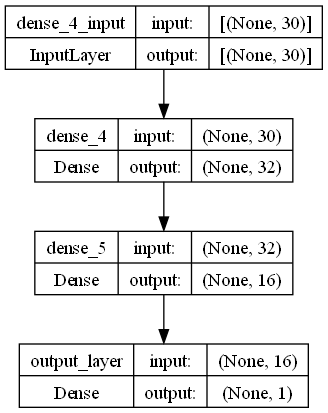

In [27]:
keras.utils.plot_model(model_cancer, show_shapes=True, to_file='model_cancer.png')

#### Train(학습)

In [28]:
hist = model_cancer.fit(train_dataset, epochs=N_EPOCH, validation_data=val_dataset)

Epoch 1/200
3/3 [==============================] - 1s 74ms/step - loss: 0.6485 - accuracy: 0.6300 - recall_2: 0.6791 - precision: 0.7135 - val_loss: 0.6592 - val_accuracy: 0.6593 - val_recall_2: 0.6842 - val_precision: 0.7500
Epoch 2/200
3/3 [==============================] - 0s 12ms/step - loss: 0.6083 - accuracy: 0.7167 - recall_2: 0.7358 - precision: 0.8068 - val_loss: 0.6213 - val_accuracy: 0.7253 - val_recall_2: 0.7193 - val_precision: 0.8200
Epoch 3/200
3/3 [==============================] - 0s 12ms/step - loss: 0.5728 - accuracy: 0.7700 - recall_2: 0.7906 - precision: 0.8389 - val_loss: 0.5861 - val_accuracy: 0.8022 - val_recall_2: 0.7895 - val_precision: 0.8824
Epoch 4/200
3/3 [==============================] - 0s 17ms/step - loss: 0.5367 - accuracy: 0.8200 - recall_2: 0.8263 - precision: 0.8820 - val_loss: 0.5530 - val_accuracy: 0.8352 - val_recall_2: 0.8246 - val_precision: 0.9038
Epoch 5/200
3/3 [==============================] - 0s 12ms/step - loss: 0.4974 - accuracy: 0.876

3/3 [==============================] - 0s 11ms/step - loss: 0.0977 - accuracy: 0.9767 - recall_2: 0.9840 - precision: 0.9788 - val_loss: 0.0966 - val_accuracy: 0.9670 - val_recall_2: 0.9474 - val_precision: 1.0000
Epoch 38/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0960 - accuracy: 0.9767 - recall_2: 0.9839 - precision: 0.9786 - val_loss: 0.0939 - val_accuracy: 0.9670 - val_recall_2: 0.9474 - val_precision: 1.0000
Epoch 39/200
3/3 [==============================] - 0s 13ms/step - loss: 0.0903 - accuracy: 0.9733 - recall_2: 0.9845 - precision: 0.9745 - val_loss: 0.0914 - val_accuracy: 0.9670 - val_recall_2: 0.9474 - val_precision: 1.0000
Epoch 40/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0905 - accuracy: 0.9767 - recall_2: 0.9840 - precision: 0.9788 - val_loss: 0.0892 - val_accuracy: 0.9670 - val_recall_2: 0.9474 - val_precision: 1.0000
Epoch 41/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0862 - accuracy: 0.9833 - reca

3/3 [==============================] - 0s 12ms/step - loss: 0.0360 - accuracy: 0.9933 - recall_2: 0.9948 - precision: 0.9948 - val_loss: 0.0493 - val_accuracy: 0.9890 - val_recall_2: 0.9825 - val_precision: 1.0000
Epoch 74/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0474 - accuracy: 0.9867 - recall_2: 0.9947 - precision: 0.9841 - val_loss: 0.0490 - val_accuracy: 0.9890 - val_recall_2: 0.9825 - val_precision: 1.0000
Epoch 75/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0470 - accuracy: 0.9867 - recall_2: 0.9946 - precision: 0.9840 - val_loss: 0.0489 - val_accuracy: 0.9890 - val_recall_2: 0.9825 - val_precision: 1.0000
Epoch 76/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0472 - accuracy: 0.9867 - recall_2: 0.9947 - precision: 0.9842 - val_loss: 0.0487 - val_accuracy: 0.9890 - val_recall_2: 0.9825 - val_precision: 1.0000
Epoch 77/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0414 - accuracy: 0.9900 - reca

3/3 [==============================] - 0s 13ms/step - loss: 0.0234 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9948 - val_loss: 0.0441 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 110/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0250 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9947 - val_loss: 0.0440 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 111/200
3/3 [==============================] - 0s 14ms/step - loss: 0.0242 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9945 - val_loss: 0.0438 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 112/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0240 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9947 - val_loss: 0.0438 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 113/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0230 - accuracy: 0.9967 - 

3/3 [==============================] - 0s 11ms/step - loss: 0.0122 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9946 - val_loss: 0.0401 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 146/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0125 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9948 - val_loss: 0.0399 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 147/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0136 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9947 - val_loss: 0.0396 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 148/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0118 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9946 - val_loss: 0.0395 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 149/200
3/3 [==============================] - 0s 12ms/step - loss: 0.0125 - accuracy: 0.9967 - r

3/3 [==============================] - 0s 19ms/step - loss: 0.0072 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9946 - val_loss: 0.0343 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 182/200
3/3 [==============================] - 0s 16ms/step - loss: 0.0067 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9946 - val_loss: 0.0341 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 183/200
3/3 [==============================] - 0s 11ms/step - loss: 0.0078 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9948 - val_loss: 0.0339 - val_accuracy: 0.9780 - val_recall_2: 0.9649 - val_precision: 1.0000
Epoch 184/200
3/3 [==============================] - 0s 10ms/step - loss: 0.0067 - accuracy: 0.9967 - recall_2: 1.0000 - precision: 0.9947 - val_loss: 0.0337 - val_accuracy: 0.9890 - val_recall_2: 0.9825 - val_precision: 1.0000
Epoch 185/200
3/3 [==============================] - 0s 9ms/step - loss: 0.0072 - accuracy: 0.9967 - r

In [29]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'recall_2', 'precision', 'val_loss', 'val_accuracy', 'val_recall_2', 'val_precision'])

In [31]:
hist.history['val_recall_2']

[0.6842105388641357,
 0.719298243522644,
 0.7894737124443054,
 0.8245614171028137,
 0.8421052694320679,
 0.8947368264198303,
 0.8947368264198303,
 0.8947368264198303,
 0.8947368264198303,
 0.9122806787490845,
 0.9122806787490845,
 0.9122806787490845,
 0.9122806787490845,
 0.9122806787490845,
 0.9122806787490845,
 0.9122806787490845,
 0.9298245906829834,
 0.9298245906829834,
 0.9298245906829834,
 0.9298245906829834,
 0.9298245906829834,
 0.9298245906829834,
 0.9298245906829834,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.9473684430122375,
 0.94736844301

#### 결과 시각화

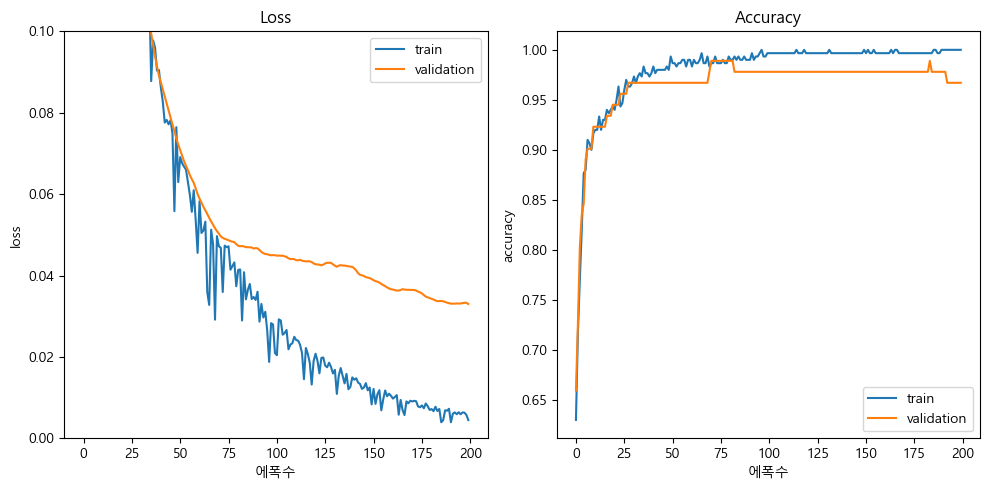

In [32]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(hist.epoch, hist.history['loss'], label="train")
plt.plot(hist.epoch, hist.history['val_loss'], label='validation')
plt.title('Loss')
plt.ylim(0, 0.1)
plt.xlabel('에폭수')
plt.ylabel('loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(hist.epoch, hist.history['accuracy'], label='train')
plt.plot(hist.epoch, hist.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.xlabel('에폭수')
plt.ylabel('accuracy')
plt.legend()

plt.tight_layout()
plt.show()

#### 최종평가

In [33]:
loss, acc, recall, precision = model_cancer.evaluate(test_dataset)
print(loss, acc, recall, precision)

3/3 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9561 - recall_2: 0.9722 - precision: 0.9589
0.2171247899532318 0.9561403393745422 0.9722222089767456 0.9589040875434875


#### 모델저장

In [34]:
save_dir_path = 'saved_model/cancer_model'

In [35]:
model_cancer.save(save_dir_path)

INFO:tensorflow:Assets written to: saved_model/cancer_model\assets


INFO:tensorflow:Assets written to: saved_model/cancer_model\assets


#### 새로운 데이터 추론

In [36]:
new_model = get_model_cancer(LEARNING_RATE) # 컴파일된 모델. 학습은 안된 모델이다. -> 파라미터가 랜덤값이라는 것.
new_model.evaluate(test_dataset)

3/3 [==============================] - 0s 4ms/step - loss: 0.5753 - accuracy: 0.7105 - recall_3: 0.5417 - precision_1: 1.0000


[0.5752942562103271, 0.7105262875556946, 0.5416666865348816, 1.0]

In [37]:
saved_model = models.load_model(save_dir_path)
saved_model.evaluate(test_dataset)

3/3 [==============================] - 0s 4ms/step - loss: 0.2171 - accuracy: 0.9561 - recall_2: 0.9722 - precision: 0.9589


[0.2171247899532318,
 0.9561403393745422,
 0.9722222089767456,
 0.9589040875434875]

In [38]:
new_X = X_test_scaled[:10]
pred = saved_model.predict(new_X)
pred.shape

1/1 [==============================] - 0s 93ms/step


(10, 1)

In [39]:
print(pred)
print(np.round(pred, 3))

[[7.3570991e-05]
 [2.3386927e-19]
 [2.8877678e-06]
 [9.9996555e-01]
 [1.6376755e-05]
 [9.9704921e-01]
 [5.0166684e-05]
 [9.9993759e-01]
 [9.9999577e-01]
 [5.4210813e-13]]
[[0.   ]
 [0.   ]
 [0.   ]
 [1.   ]
 [0.   ]
 [0.997]
 [0.   ]
 [1.   ]
 [1.   ]
 [0.   ]]


##### 모델출력결과 후처리

In [40]:
np.where(pred >= 0.5, '양성종양 - 1', '악성종양 - 0')

array([['악성종양 - 0'],
       ['악성종양 - 0'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['악성종양 - 0'],
       ['양성종양 - 1'],
       ['양성종양 - 1'],
       ['악성종양 - 0']], dtype='<U8')

In [ ]:
y_test[:10]